In [1]:
!pip install pystan fbprophet

In [82]:
import pandas as pd
from fbprophet import Prophet
from datetime import datetime

In [196]:
df = pd.read_csv(r'/Users/Roger/Downloads/BTC_model_simple.csv')

In [197]:
df.describe()

,Time,BTC volume (USD) (CB),BTC Price CB
count,3.360000e+02,3.360000e+02,336.000000
mean,2.017806e+07,3.006609e+13,8050.048958
std,1.867356e+04,9.428750e+13,11890.096403
min,2.015010e+07,3.391709e+05,188.490000
25%,2.016081e+07,1.450869e+10,616.405000
50%,2.018032e+07,1.945000e+12,5378.615000
75%,2.019105e+07,7.785000e+12,9277.012500
max,2.021061e+07,5.870000e+14,61104.650000


In [198]:
df.head()

,Time,BTC volume (USD) (CB),BTC Price CB
0,20150105,3.391709e+05,295.32
1,20150112,6.783418e+05,188.49
2,20150119,2.886583e+07,237.24
3,20150126,2.261473e+09,244.15
4,20150202,2.384785e+09,226.67


In [199]:
df.dtypes

Time                       int64
BTC volume (USD) (CB)    float64
BTC Price CB             float64
dtype: object

In [200]:

df['Date'] =  pd.to_datetime(df['Time'], format='%Y%m%d')
#make sure no separators between YMD in excel

#raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y:%H:%M:%S.%f')

In [201]:
df.head(100)

,Time,BTC volume (USD) (CB),BTC Price CB,Date
0,20150105,3.391709e+05,295.32,2015-01-05
1,20150112,6.783418e+05,188.49,2015-01-12
2,20150119,2.886583e+07,237.24,2015-01-19
3,20150126,2.261473e+09,244.15,2015-01-26
4,20150202,2.384785e+09,226.67,2015-02-02
...,...,...,...,...
95,20161031,1.933289e+10,713.15,2016-10-31
96,20161107,1.819167e+10,711.77,2016-11-07
97,20161114,1.691182e+10,730.24,2016-11-14
98,20161121,1.244232e+10,736.72,2016-11-21


In [202]:
df.dtypes

Time                              int64
BTC volume (USD) (CB)           float64
BTC Price CB                    float64
Date                     datetime64[ns]
dtype: object

In [203]:
df.drop(['Time', 'BTC volume (USD) (CB)'], axis=1, inplace=True)
#axis = 1 becuawe we're dropping columns
#inplace=True because we're editing the existing df and not creating a new one

In [204]:
df.columns = ['y', 'ds']
df.tail()

,y,ds
331,51978.54,2021-05-10
332,39858.95,2021-05-17
333,37213.71,2021-05-24
334,36882.15,2021-05-31
335,35677.73,2021-06-07


In [221]:
#Train model
m = Prophet(interval_width=0.95, seasonality_mode='multiplicative')
model = m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [222]:
future = m.make_future_dataframe(periods=10,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2015-01-05,-223.538566,-5815.308474,4924.190238,-223.538566,-223.538566,0.236754,0.236754,0.236754,0.236754,0.236754,0.236754,0.0,0.0,0.0,-276.462261
1,2015-01-12,-211.022279,-5596.660558,5344.814342,-211.022279,-211.022279,0.218959,0.218959,0.218959,0.218959,0.218959,0.218959,0.0,0.0,0.0,-257.227448
2,2015-01-19,-198.505992,-6069.867027,5807.777477,-198.505992,-198.505992,0.141662,0.141662,0.141662,0.141662,0.141662,0.141662,0.0,0.0,0.0,-226.626808
3,2015-01-26,-185.989705,-5969.795304,5598.809263,-185.989705,-185.989705,0.123390,0.123390,0.123390,0.123390,0.123390,0.123390,0.0,0.0,0.0,-208.938924
4,2015-02-02,-173.473417,-5901.668224,5512.047959,-173.473417,-173.473417,0.228210,0.228210,0.228210,0.228210,0.228210,0.228210,0.0,0.0,0.0,-213.061744


In [223]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
341,2021-06-13,40687.854906,29536.112584,41420.616964,40687.854906,40692.181999,-0.130948,-0.130948,-0.130948,-0.130948,-0.130948,-0.130948,0.0,0.0,0.0,35359.875022
342,2021-06-14,40762.070960,29454.347639,41146.893715,40761.352482,40770.970593,-0.134762,-0.134762,-0.134762,-0.134762,-0.134762,-0.134762,0.0,0.0,0.0,35268.878052
343,2021-06-15,40836.287014,29057.777977,40821.858176,40833.697576,40847.053572,-0.139144,-0.139144,-0.139144,-0.139144,-0.139144,-0.139144,0.0,0.0,0.0,35154.172869
344,2021-06-16,40910.503067,29655.949691,40456.213412,40905.777803,40923.957116,-0.144075,-0.144075,-0.144075,-0.144075,-0.144075,-0.144075,0.0,0.0,0.0,35016.328658
345,2021-06-17,40984.719121,29047.026722,40702.858352,40975.509889,41001.905855,-0.149522,-0.149522,-0.149522,-0.149522,-0.149522,-0.149522,0.0,0.0,0.0,34856.599784


In [224]:
forecast[['ds','yhat']]

,ds,yhat
0,2015-01-05,-276.462261
1,2015-01-12,-257.227448
2,2015-01-19,-226.626808
3,2015-01-26,-208.938924
4,2015-02-02,-213.061744
...,...,...
341,2021-06-13,35359.875022
342,2021-06-14,35268.878052
343,2021-06-15,35154.172869
344,2021-06-16,35016.328658


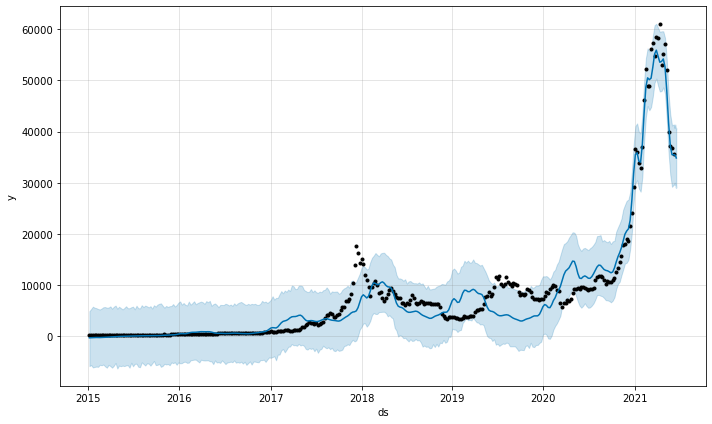

In [226]:
plot1 = m.plot(forecast)

In [227]:
from fbprophet.plot import add_changepoints_to_plot

In [ ]:
fig_air=model_air.plot(forecast_air)
a=add_changepoints_to_plot(fig_air.gca(),model_air,forecast_air)
